In [1]:
import random
import numpy as np

In [12]:
reference = [1,1,1,1,1]
chromosome_length = 5
population_size = 4
maximum_generation = 200
best_score_progress = []

In [3]:
def create_starting_population(individuals, chromosome_length):
    population = np.zeros((individuals, chromosome_length))
    for i in range(individuals):
        ones = random.randint(0, chromosome_length)
        population[i, 0:ones] = 1
        np.random.shuffle(population[i])
    return population

In [4]:
def calculate_fitness(reference, population):
    identical_to_reference = population == reference
    fitness_scores = identical_to_reference.sum(axis=1)
    return fitness_scores

In [5]:
def select_individual_by_tournament(population, scores):
    population_size = len(scores)
    
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]

    if fighter_1_fitness >= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2

    return population[winner, :]

In [6]:
def breed_by_crossover(parent_1, parent_2):
    chromosome_length = len(parent_1)
    crossover_point = random.randint(1,chromosome_length-1)
    child_1 = np.hstack((parent_1[0:crossover_point],parent_2[crossover_point:]))
    child_2 = np.hstack((parent_2[0:crossover_point],parent_1[crossover_point:]))
    return child_1, child_2

In [7]:
def randomly_mutate_population(population, mutation_probability):
    
        random_mutation_array = np.random.random(
            size=(population.shape))
        
        random_mutation_boolean = \
            random_mutation_array <= mutation_probability

        population[random_mutation_boolean] = \
        np.logical_not(population[random_mutation_boolean])
        
        return population

In [13]:
population = create_starting_population(population_size, chromosome_length)
print(population)

[[0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


Starting best score, % target:  80.0
End best score, % target:  100.0


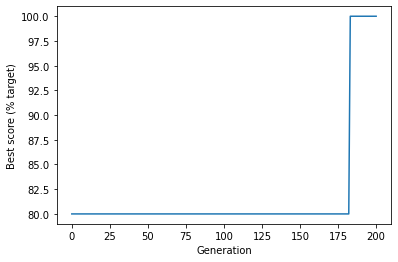

In [14]:
scores = calculate_fitness(reference, population)
best_score = np.max(scores)/chromosome_length * 100
print ('Starting best score, % target: ',best_score)

best_score_progress.append(best_score)

for generation in range(maximum_generation):
    new_population = []
    
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, scores)
        parent_2 = select_individual_by_tournament(population, scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    population = np.array(new_population)

    mutation_rate = 0.002
    population = randomly_mutate_population(population, mutation_rate)
    
    scores = calculate_fitness(reference, population)
    best_score = np.max(scores)/chromosome_length * 100
    best_score_progress.append(best_score)


print ('End best score, % target: ', best_score)

# Plot progress
import matplotlib.pyplot as plt
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()